# Trabalho de Estatística e Modelos Probabilísticos - COE241

In [1]:
# Import necessary libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.interpolate import interp1d

In [2]:
# Carregar os datasets
chromecast_data = pd.read_csv("dataset_chromecast.csv")
smart_tv_data = pd.read_csv("dataset_smart-tv.csv")

In [3]:
# Função que aplica a transformação logarítmica a uma coluna específica de um DataFrame
def log_transform(df, column):
    df[column] = df[column].apply(lambda x: 0 if x == 0 else math.log(x, 10))

# Reescalonação dos dados para log de base 10
for column in ["bytes_up", "bytes_down"]:
    log_transform(chromecast_data, column)
    log_transform(smart_tv_data, column)

## Estatísticas gerais

Seção com os estudo dos dados sem considerar os horários em que foram gerados. A ordem das estatísticas apresentadas abaixo segue a ordem descrita no trabalho: Para cada tipo de dispositivo, Smart-TV e Chromecast, é feito Histograma, Função Distribuição Empírica, Box Plot, Média, Variância e Desvio Padrão, para a taxa de upload e a taxa de download.

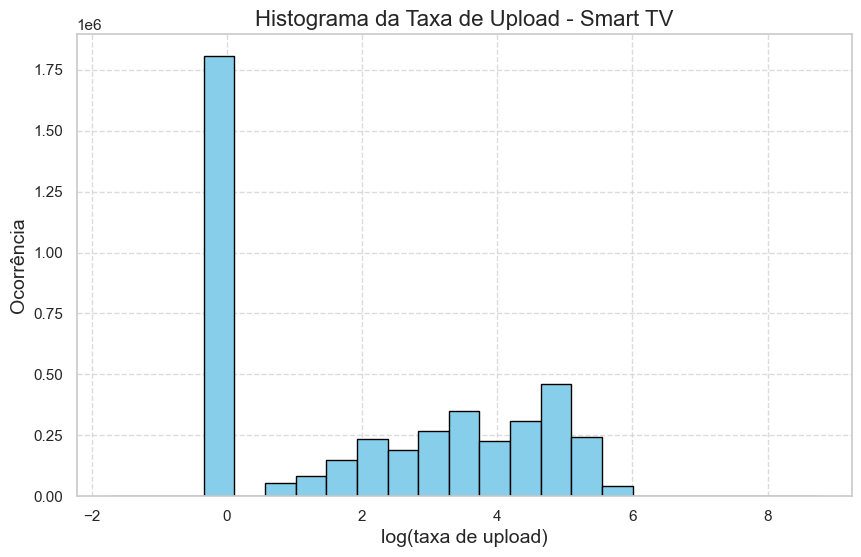

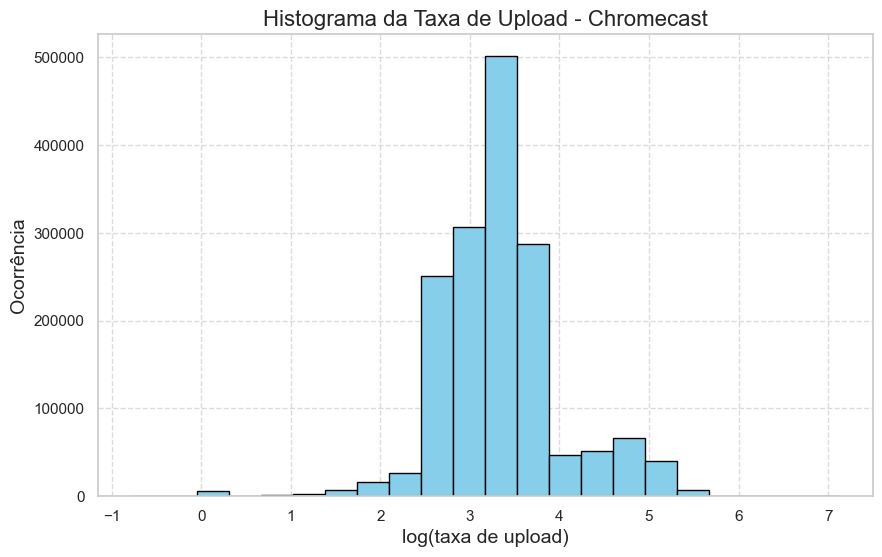

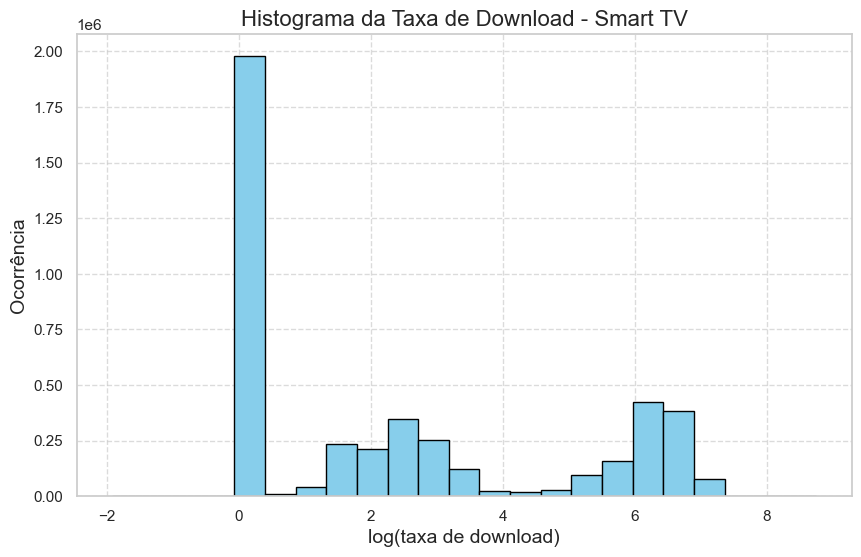

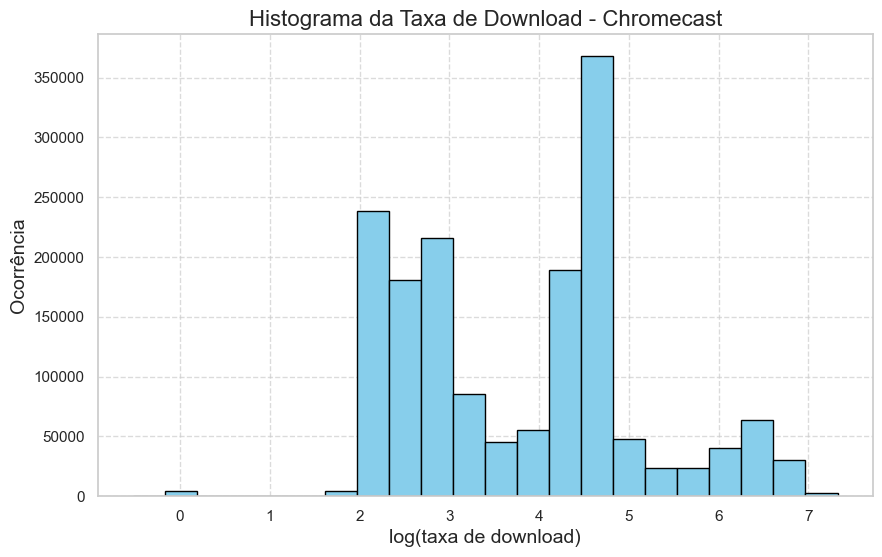

In [4]:
### Histogramas dos Dados

# Configurar o estilo do gráfico
sns.set_theme(style="whitegrid")

# Função para criar histogramas
def plot_histogram(df, column, title, xlabel, ylabel):
    n = len(df[column])
    m = round(1 + 3.322 * math.log(n, 10))
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=m, edgecolor='black', color='skyblue')
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Plotar histogramas para cada dataset e cada taxa
plot_histogram(smart_tv_data, "bytes_up", "Histograma da Taxa de Upload - Smart TV", "log(taxa de upload)", "Ocorrência")
plot_histogram(chromecast_data, "bytes_up", "Histograma da Taxa de Upload - Chromecast", "log(taxa de upload)", "Ocorrência")
plot_histogram(smart_tv_data, "bytes_down", "Histograma da Taxa de Download - Smart TV", "log(taxa de download)", "Ocorrência")
plot_histogram(chromecast_data, "bytes_down", "Histograma da Taxa de Download - Chromecast", "log(taxa de download)", "Ocorrência")

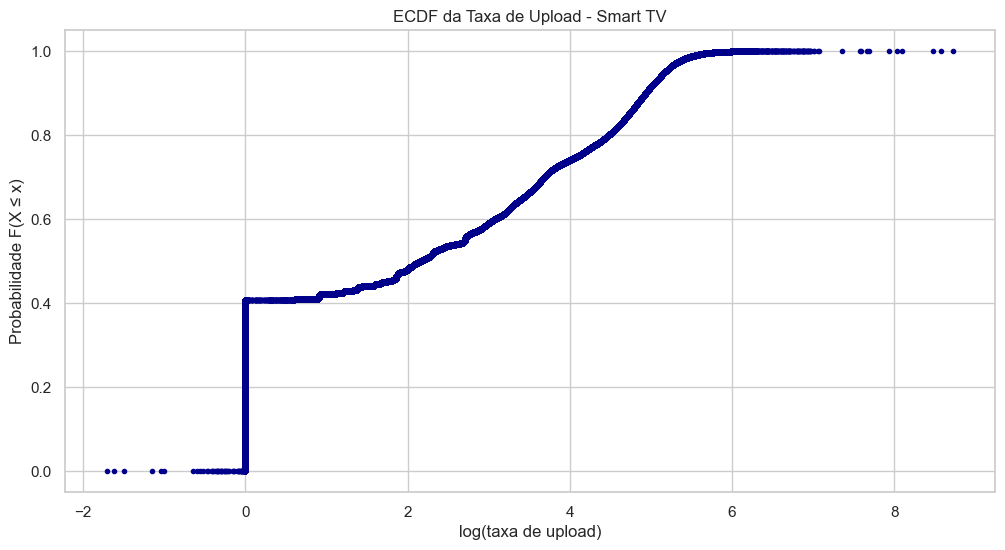

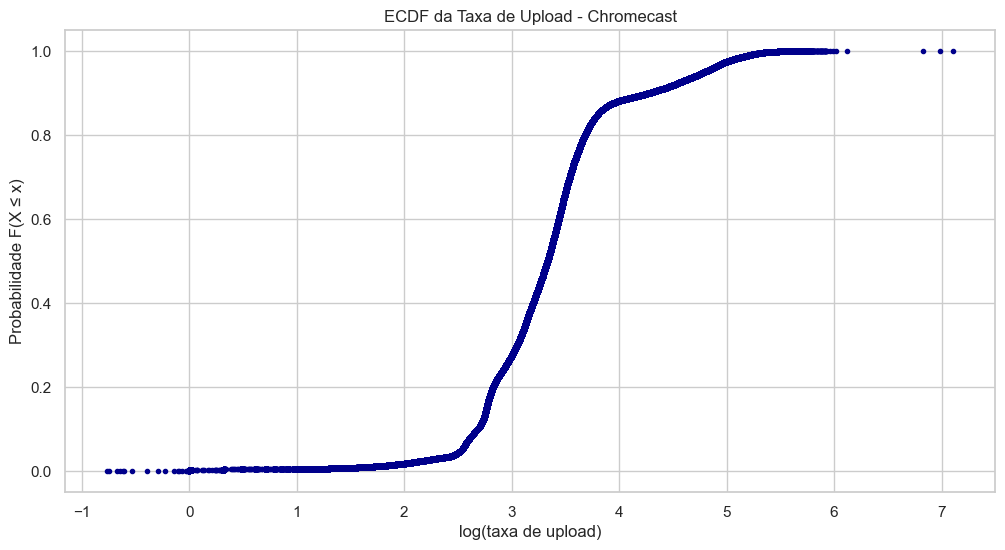

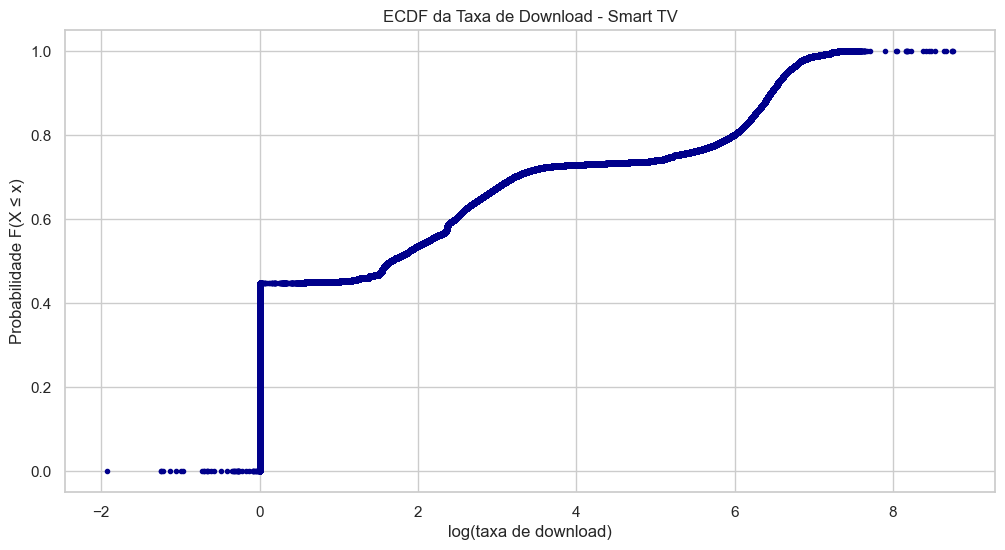

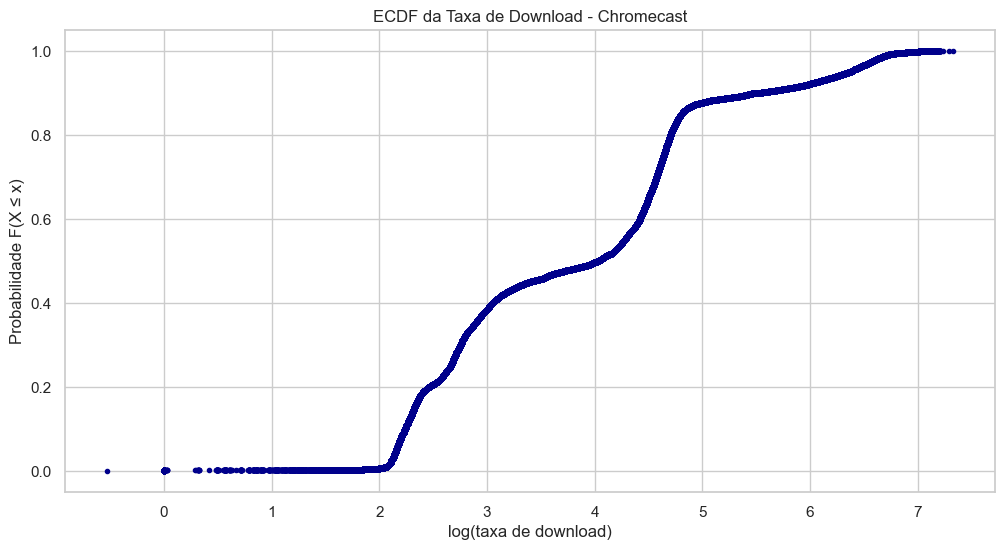

In [5]:
### ECDFs dos Dados

# Função para calcular a ECDF - Função de Distribuição Acumulada Empírica
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

# Plotar ECDFs
def plot_ecdf(df, column, title, xlabel, ylabel):
    x, y = ecdf(df[column])
    plt.figure(figsize=(12, 6))  # Definir o tamanho do gráfico
    plt.plot(x, y, marker='.', linestyle='none', color='darkblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Plotar ECDFs para cada dataset e cada taxa
datasets_ecdf = [
    (smart_tv_data, "bytes_up", "ECDF da Taxa de Upload - Smart TV", "log(taxa de upload)", "Probabilidade F(X ≤ x)"),
    (chromecast_data, "bytes_up", "ECDF da Taxa de Upload - Chromecast", "log(taxa de upload)", "Probabilidade F(X ≤ x)"),
    (smart_tv_data, "bytes_down", "ECDF da Taxa de Download - Smart TV", "log(taxa de download)", "Probabilidade F(X ≤ x)"),
    (chromecast_data, "bytes_down", "ECDF da Taxa de Download - Chromecast", "log(taxa de download)", "Probabilidade F(X ≤ x)")
]

for df, column, title, xlabel, ylabel in datasets_ecdf:
    plot_ecdf(df, column, title, xlabel, ylabel)

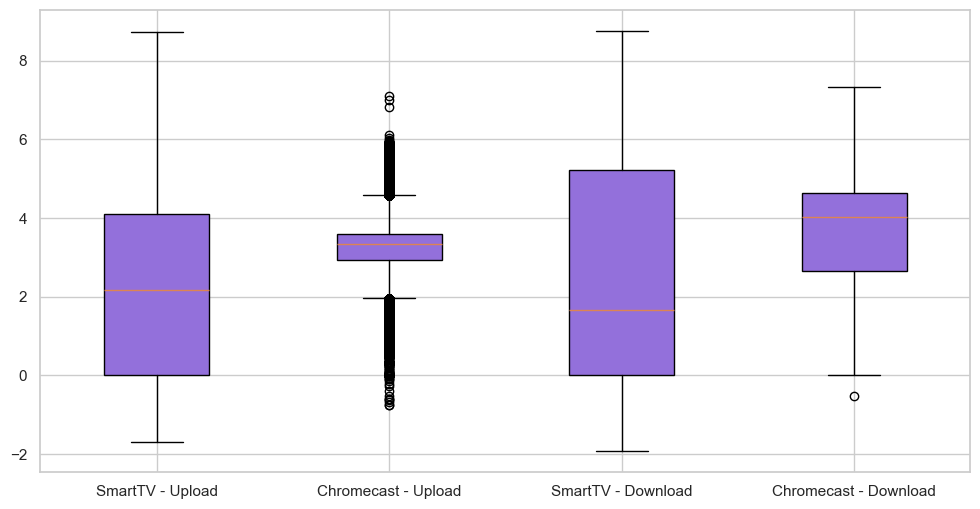

In [6]:
### Boxplots dos Dados

fig, ax = plt.subplots(figsize=(12, 6))  # Aumentar a largura do gráfico

bp = ax.boxplot([smart_tv_data['bytes_up'], chromecast_data['bytes_up'],  
                 smart_tv_data['bytes_down'], chromecast_data['bytes_down']], patch_artist=True)

colors = ['mediumpurple', 'mediumpurple', 'mediumpurple', 'mediumpurple']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(['SmartTV - Upload', 'Chromecast - Upload', 'SmartTV - Download', 'Chromecast - Download'])

plt.show()

In [7]:
### Estatísticas Descritivas - Média, Variância e Desvio Padrão 

# Função para calcular Média, Variância e Desvio Padrão 
def calculate_statistics(df, column):
    mean = df[column].mean()
    variance = df[column].var()
    std_dev = df[column].std()
    return mean, variance, std_dev

# Calcular estatísticas para cada coluna
stats = {
    "Taxa de Upload - Smart TV": calculate_statistics(smart_tv_data, "bytes_up"),
    "Taxa de Upload - Chromecast": calculate_statistics(chromecast_data, "bytes_up"),
    "Taxa de Download - Smart TV": calculate_statistics(smart_tv_data, "bytes_down"),
    "Taxa de Download - Chromecast": calculate_statistics(chromecast_data, "bytes_down"),
}

# Criar DataFrame para exibir as estatísticas
stats_df = pd.DataFrame(stats, index=["Média", "Variância", "Desvio Padrão"])

# Exibir a tabela com os dados calculados
styled_stats_df = stats_df.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('border', '1px solid black')]},
        {'selector': 'caption', 'props': [('background-color', '#1a5a8a'), ('color', 'white'), ('font-size', '16px')]}
    ]
).set_properties(
    **{
        'background-color': '#eaf2f8',
        'border': '1px solid black',
        'text-align': 'center',
        'color': 'black'
    }
).set_caption("Estatísticas Descritivas")

display(styled_stats_df)



# Criar markdown com os dados calculados
chromecast_upload_stats = stats["Taxa de Upload - Chromecast"]
chromecast_download_stats = stats["Taxa de Download - Chromecast"]
smart_tv_upload_stats = stats["Taxa de Upload - Smart TV"]
smart_tv_download_stats = stats["Taxa de Download - Smart TV"]

markdown_text = f"""
### Smart TV
A média da taxa de upload é  {smart_tv_upload_stats[0]} e a da taxa de download é  {smart_tv_download_stats[0]};  
A variância da taxa de upload é  {smart_tv_upload_stats[1]} e a da taxa de download é  {smart_tv_download_stats[1]};  
O desvio padrão da taxa de upload é  {smart_tv_upload_stats[2]} e o da taxa de download é  {smart_tv_download_stats[2]}.

### Chromecast
A média da taxa de upload é  {chromecast_upload_stats[0]} e a da taxa de download é  {chromecast_download_stats[0]};  
A variância da taxa de upload é  {chromecast_upload_stats[1]} e a da taxa de download é  {chromecast_download_stats[1]};  
O desvio padrão da taxa de upload é  {chromecast_upload_stats[2]} e o da taxa de download é  {chromecast_download_stats[2]}.
"""

# Exibir o markdown
from IPython.display import Markdown, display
display(Markdown(markdown_text))

,Taxa de Upload - Smart TV,Taxa de Upload - Chromecast,Taxa de Download - Smart TV,Taxa de Download - Chromecast
Média,2.156590,3.349672,2.350173,3.799335
Variância,4.113083,0.461600,6.723921,1.665980
Desvio Padrão,2.028074,0.679412,2.593052,1.290728



### Smart TV
A média da taxa de upload é  2.1565902037563727 e a da taxa de download é  2.3501726398959035;  
A variância da taxa de upload é  4.113082752316163 e a da taxa de download é  6.723920763635552;  
O desvio padrão da taxa de upload é  2.028073655545124 e o da taxa de download é  2.5930524027939645.

### Chromecast
A média da taxa de upload é  3.3496717251158694 e a da taxa de download é  3.799335488086478;  
A variância da taxa de upload é  0.46160016892790373 e a da taxa de download é  1.6659798143232258;  
O desvio padrão da taxa de upload é  0.6794116343777928 e o da taxa de download é  1.2907284045542757.


## Estatísticas por horário

Seção com a avaliação dos dados considerando os horários em que foram gerados independente do dia. A ordem das estatísticas apresentadas abaixo segue a ordem descrita no trabalho: Para cada tipo de dispositivo, Smart-TV e Chromecast, e para cada horário, é feito Box Plot, Média, Variância e Desvio Padrão, para a taxa de upload e a taxa de download.

In [8]:
# Transformar a coluna de data em datetime e definir como índice
chromecast_data['date_hour'] = pd.to_datetime(chromecast_data['date_hour'])
chromecast_data = chromecast_data.set_index('date_hour')

smart_tv_data['date_hour'] = pd.to_datetime(smart_tv_data['date_hour'])
smart_tv_data = smart_tv_data.set_index('date_hour')


# Agrupar os dados por hora
groupedHourChrome = chromecast_data.groupby(chromecast_data.index.hour)
groupedHourSmart = smart_tv_data.groupby(smart_tv_data.index.hour)

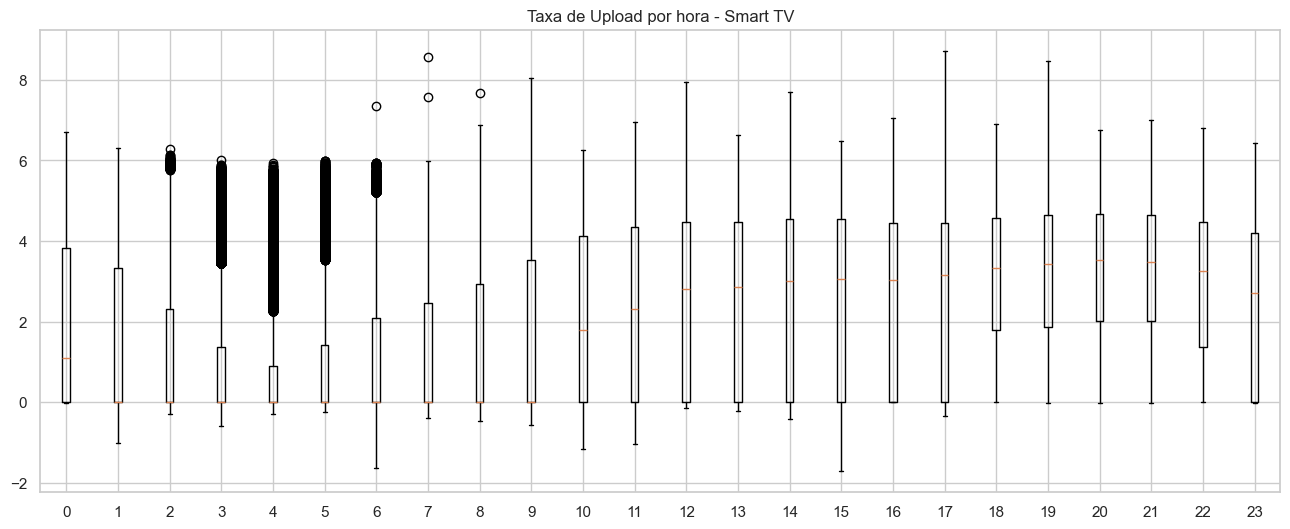

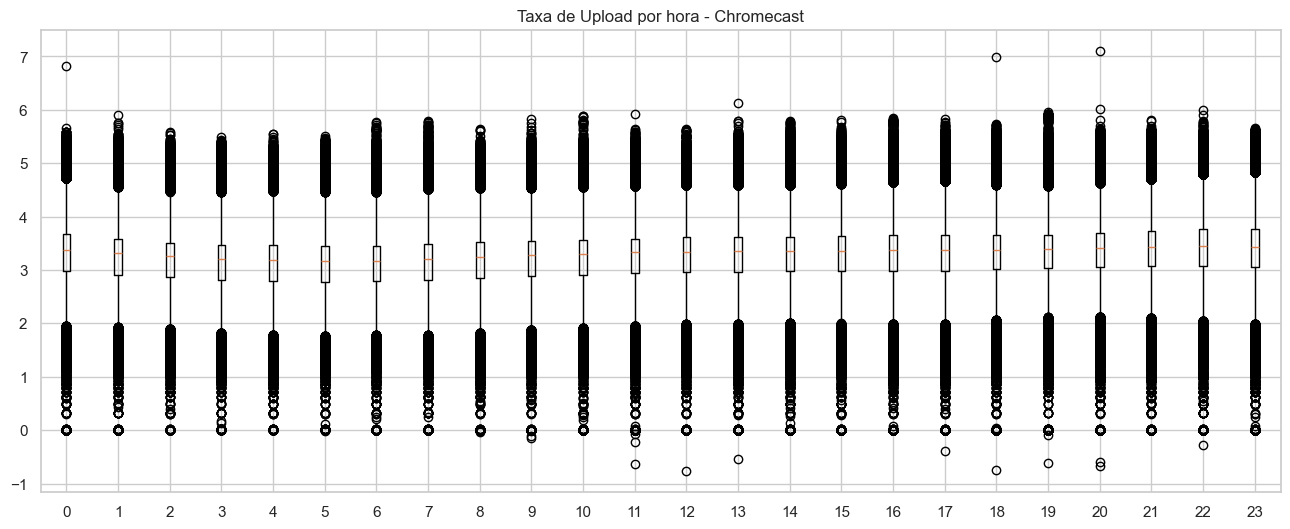

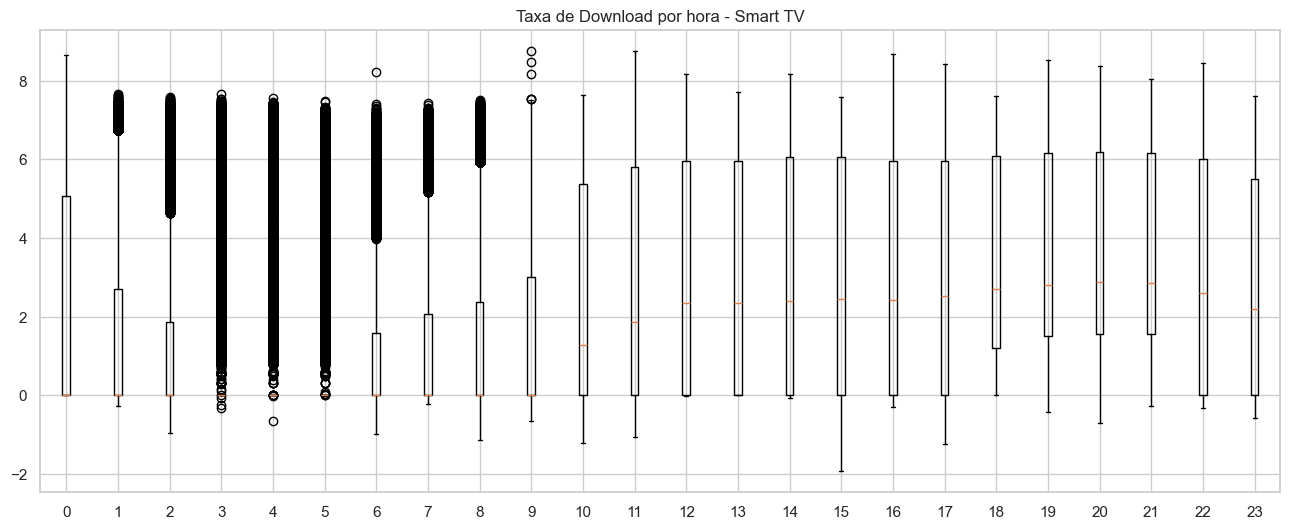

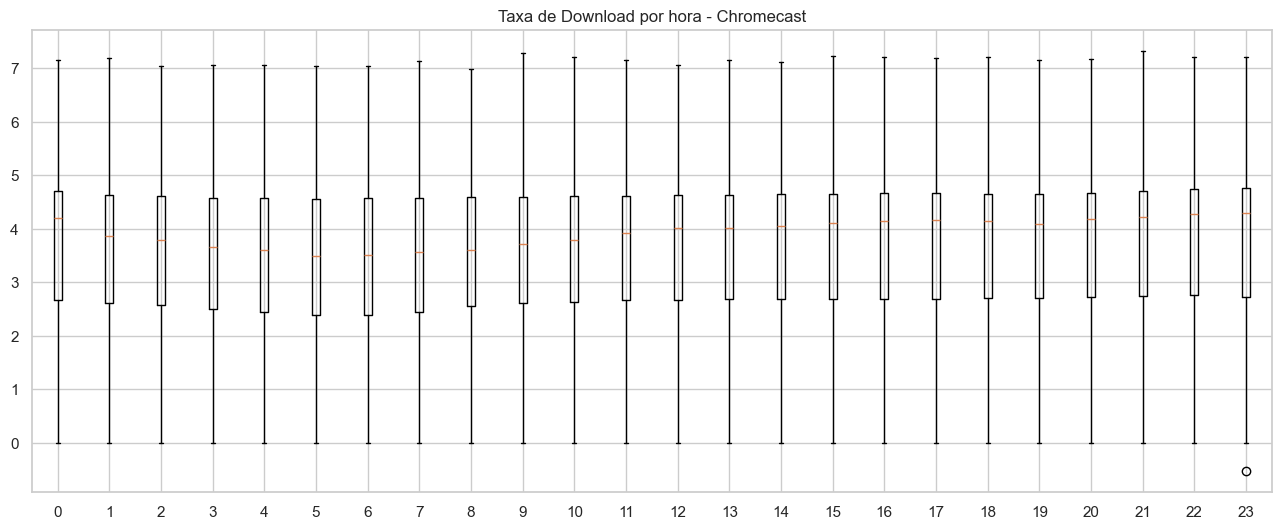

In [9]:
### Box Plots

def plot_boxplots(grouped_data, column, title):
    fig, ax = plt.subplots(figsize=(16, 6))
    for i, (hour, group) in enumerate(grouped_data):
        ax.boxplot(group[column], positions=[i])
    ax.set_xticks(range(len(grouped_data)))
    ax.set_title(title)
    plt.show()

# Taxa de upload da Smart TV
plot_boxplots(groupedHourSmart, 'bytes_up', 'Taxa de Upload por hora - Smart TV')

# Taxa de upload do Chromecast
plot_boxplots(groupedHourChrome, 'bytes_up', 'Taxa de Upload por hora - Chromecast')

# Taxa de download da Smart TV
plot_boxplots(groupedHourSmart, 'bytes_down', 'Taxa de Download por hora - Smart TV')

# Taxa de download do Chromecast
plot_boxplots(groupedHourChrome, 'bytes_down', 'Taxa de Download por hora - Chromecast')

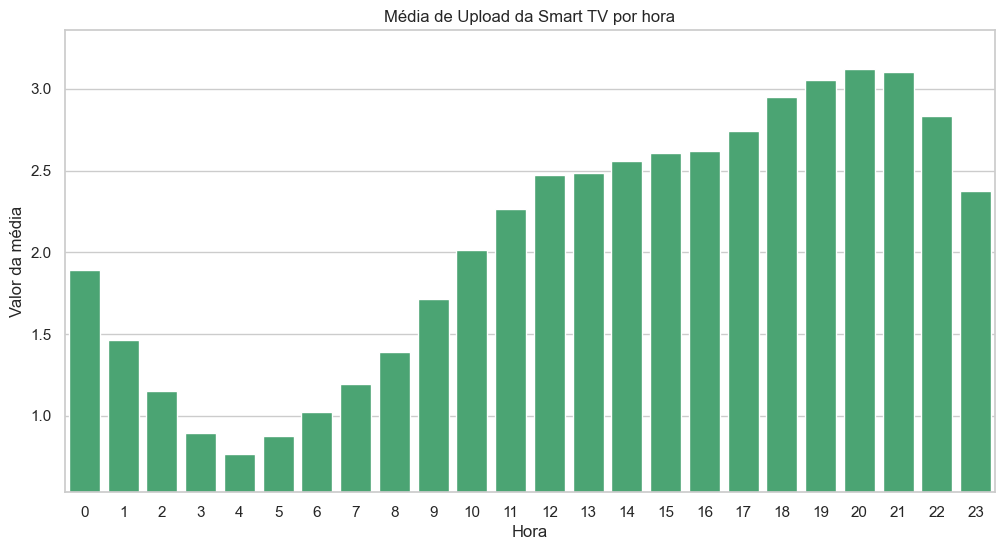

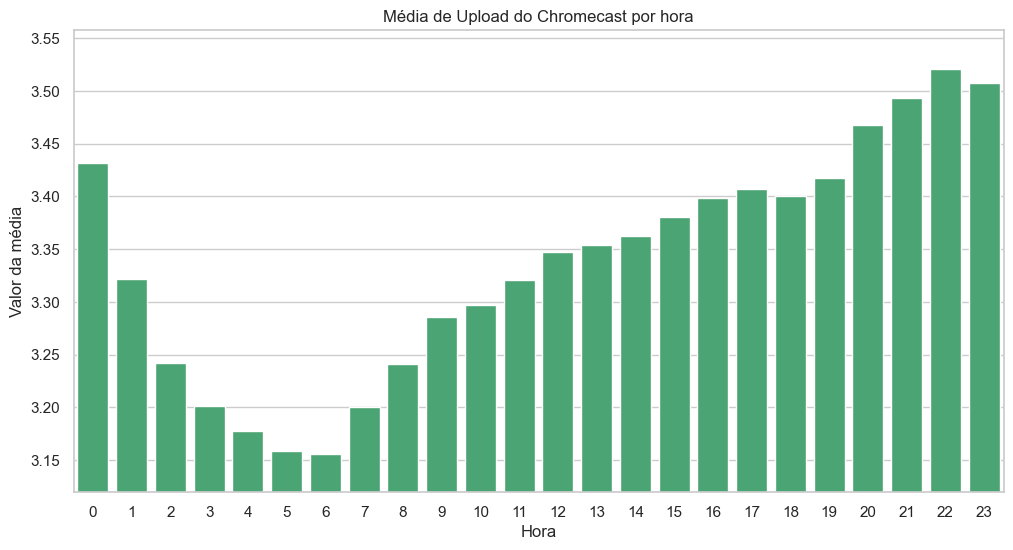

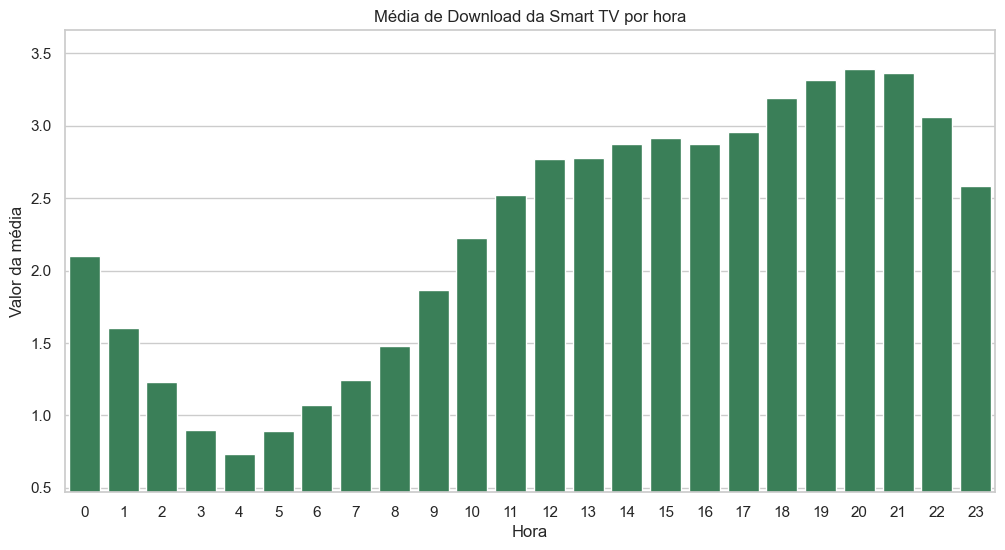

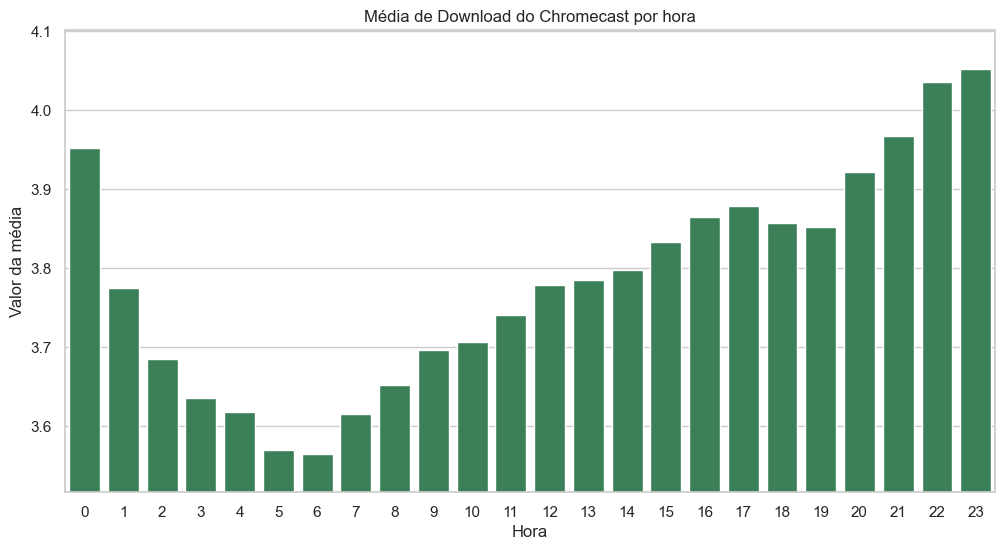

In [10]:
### Média por hora
meanHourlyChrome = groupedHourChrome.mean()
meanHourlySmart = groupedHourSmart.mean()

# Função para plotar gráficos de barras com cores especificadas
def plot_bar(data, column, title, xlabel, ylabel, color):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=data.index, y=data[column], color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(data[column].min() - 0.1 * (data[column].max() - data[column].min()), 
             data[column].max() + 0.1 * (data[column].max() - data[column].min()))
    plt.show()

# Gráfico de barras para a média de upload da Smart TV e Chromecast
plot_bar(meanHourlySmart, 'bytes_up', 'Média de Upload da Smart TV por hora', 'Hora', 'Valor da média', 'mediumseagreen')
plot_bar(meanHourlyChrome, 'bytes_up', 'Média de Upload do Chromecast por hora', 'Hora', 'Valor da média', 'mediumseagreen')

# Gráfico de barras para a média de download da Smart TV e Chromecast
plot_bar(meanHourlySmart, 'bytes_down', 'Média de Download da Smart TV por hora', 'Hora', 'Valor da média', 'seagreen')
plot_bar(meanHourlyChrome, 'bytes_down', 'Média de Download do Chromecast por hora', 'Hora', 'Valor da média', 'seagreen')

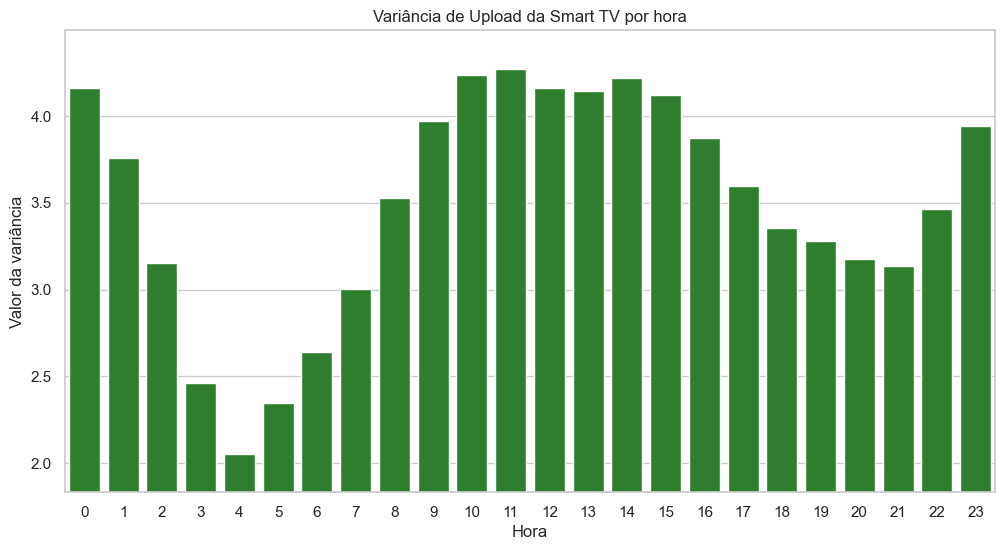

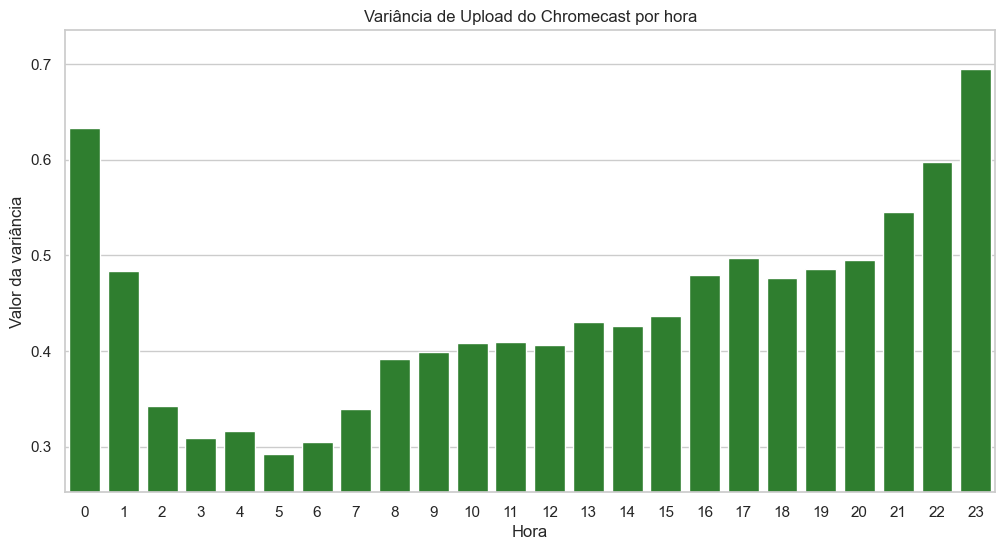

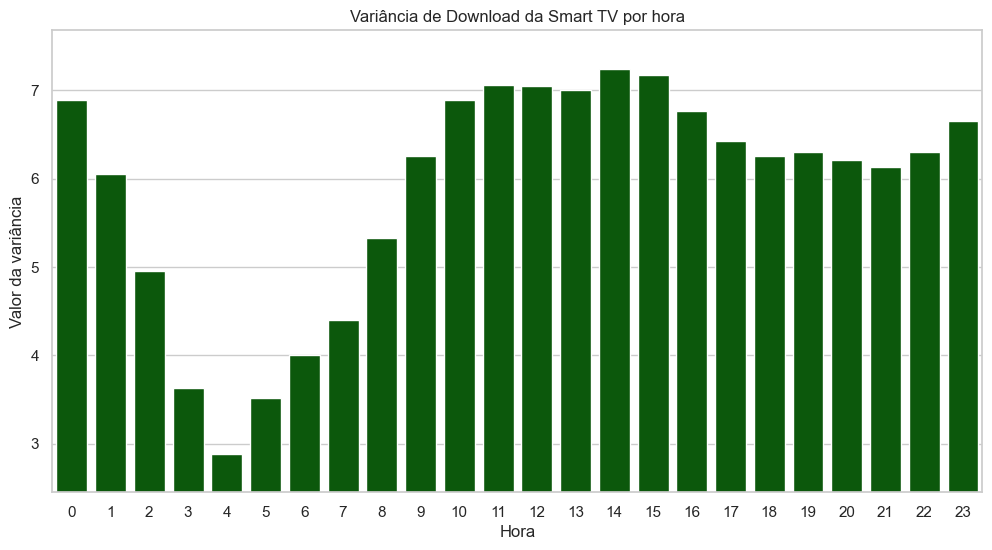

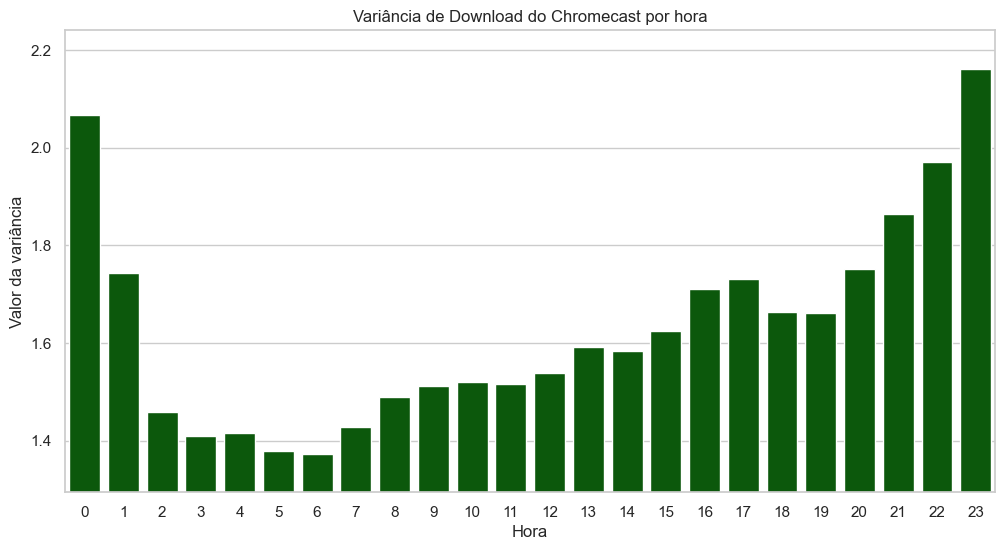

In [11]:
### Variância por hora
varianceHourlyChrome = groupedHourChrome.var()
varianceHourlySmart = groupedHourSmart.var()

# Gráfico de barras para a variância de upload da Smart TV e Chromecast
plot_bar(varianceHourlySmart, 'bytes_up', 'Variância de Upload da Smart TV por hora', 'Hora', 'Valor da variância', 'forestgreen')
plot_bar(varianceHourlyChrome, 'bytes_up', 'Variância de Upload do Chromecast por hora', 'Hora', 'Valor da variância', 'forestgreen')

# Gráfico de barras para a variância de download da Smart TV e Chromecast
plot_bar(varianceHourlySmart, 'bytes_down', 'Variância de Download da Smart TV por hora', 'Hora', 'Valor da variância', 'darkgreen')
plot_bar(varianceHourlyChrome, 'bytes_down', 'Variância de Download do Chromecast por hora', 'Hora', 'Valor da variância', 'darkgreen')

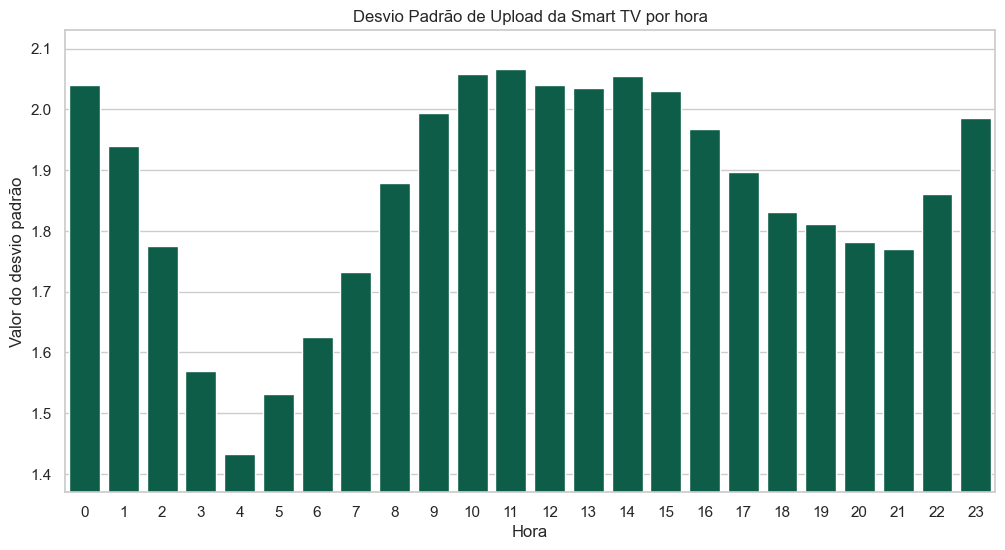

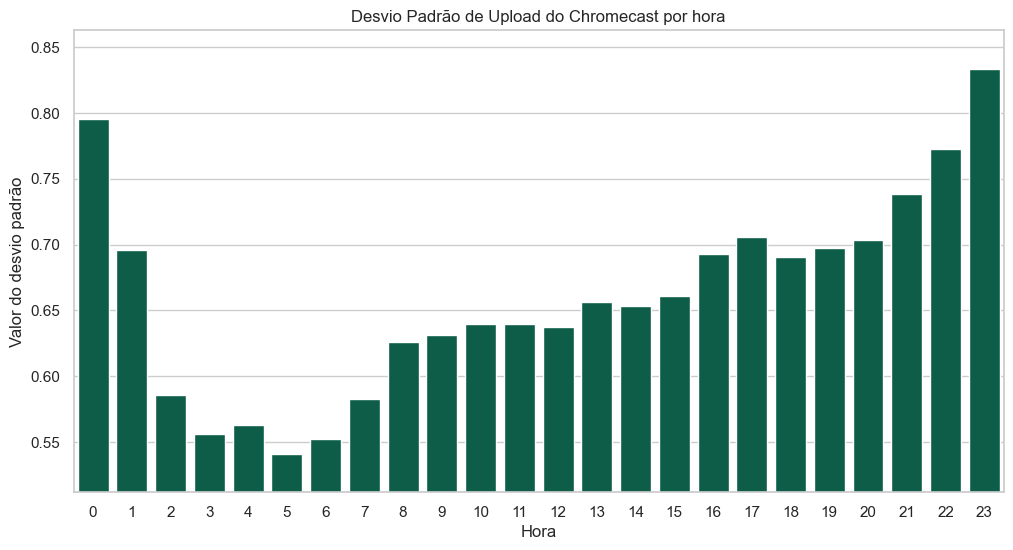

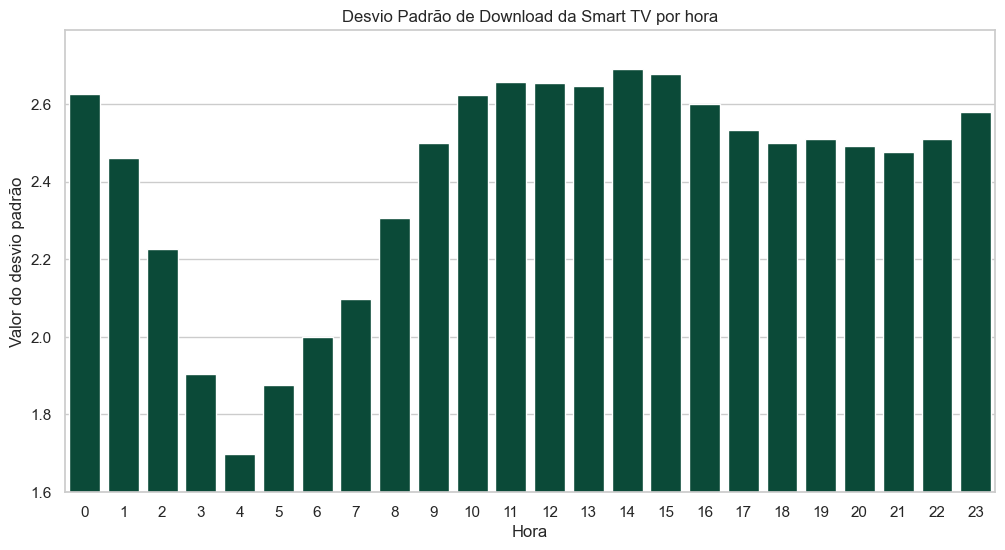

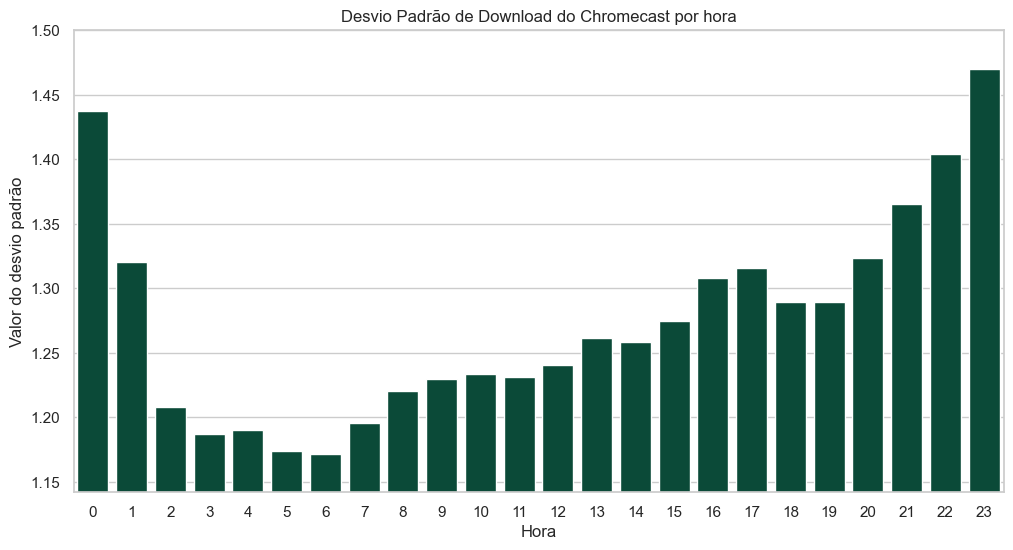

In [12]:
### Desvio padrão por hora
standardDevHourlyChrome = groupedHourChrome.std()
standardDevHourlySmart = groupedHourSmart.std()

# Gráfico de barras para o desvio padrão de upload da Smart TV e Chromecast
plot_bar(standardDevHourlySmart, 'bytes_up', 'Desvio Padrão de Upload da Smart TV por hora', 'Hora', 'Valor do desvio padrão', '#006A4E')
plot_bar(standardDevHourlyChrome, 'bytes_up', 'Desvio Padrão de Upload do Chromecast por hora', 'Hora', 'Valor do desvio padrão', '#006A4E')

# Gráfico de barras para o desvio padrão de download da Smart TV e Chromecast
plot_bar(standardDevHourlySmart, 'bytes_down', 'Desvio Padrão de Download da Smart TV por hora', 'Hora', 'Valor do desvio padrão', '#00543D')
plot_bar(standardDevHourlyChrome, 'bytes_down', 'Desvio Padrão de Download do Chromecast por hora', 'Hora', 'Valor do desvio padrão', '#00543D')

## Caracterizando os horários com maior valor de tráfego

Seção com a análise dos dois horários com maior valor da média de cada taxa coletada para cada tipo de dispositivo. Para isso, é feito 3 passos como descrito no projeto

### Passo 1
Análise dos dois horários com maior valor da média de cada taxa coletada para cada tipo de dispositivo.

In [13]:
# Identificar horários com maior média de upload e download
peak_hour_upload_smart = meanHourlySmart['bytes_up'].idxmax()
peak_hour_download_smart = meanHourlySmart['bytes_down'].idxmax()
peak_hour_upload_chrome = meanHourlyChrome['bytes_up'].idxmax()
peak_hour_download_chrome = meanHourlyChrome['bytes_down'].idxmax()

# Exibir horários de pico
print(f"Dataset 1 - Horário de pico de upload da Smart TV: {peak_hour_upload_smart}h")
print(f"Dataset 2 - Horário de pico de download da Smart TV: {peak_hour_download_smart}h")
print(f"Dataset 3 - Horário de pico de upload do Chromecast: {peak_hour_upload_chrome}h")
print(f"Dataset 4 - Horário de pico de download do Chromecast: {peak_hour_download_chrome}h")


# Definir os datasets para os horários de pico de upload e download da Smart TV e Chromecast
dataset1 = groupedHourSmart.get_group(peak_hour_upload_smart) # Smart TV - Upload
dataset2 = groupedHourSmart.get_group(peak_hour_download_smart) # Smart TV - Download
dataset3 = groupedHourChrome.get_group(peak_hour_upload_chrome) # Chromecast - Upload
dataset4 = groupedHourChrome.get_group(peak_hour_download_chrome) # Chromecast - Download

Dataset 1 - Horário de pico de upload da Smart TV: 20h
Dataset 2 - Horário de pico de download da Smart TV: 20h
Dataset 3 - Horário de pico de upload do Chromecast: 22h
Dataset 4 - Horário de pico de download do Chromecast: 23h


### Passo 2

Um histograma para cada um dos 4 datasets definidos no Passo 1.

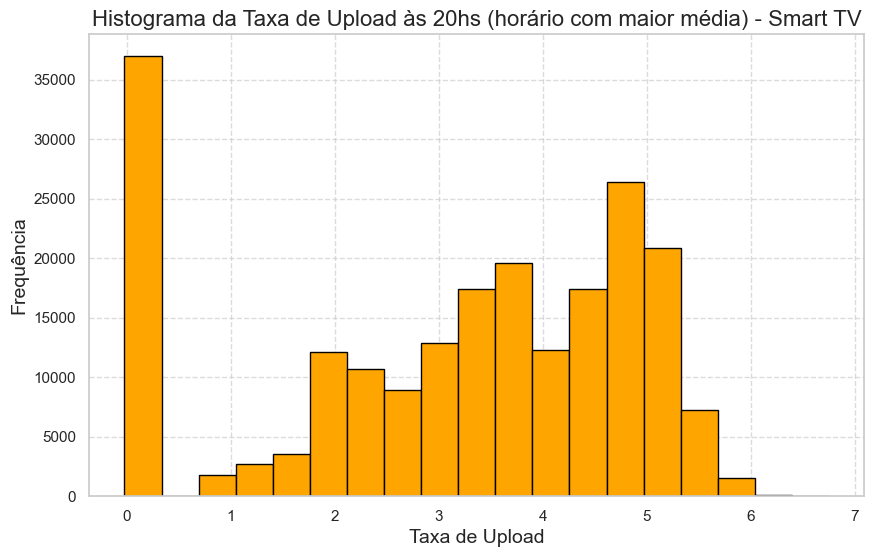

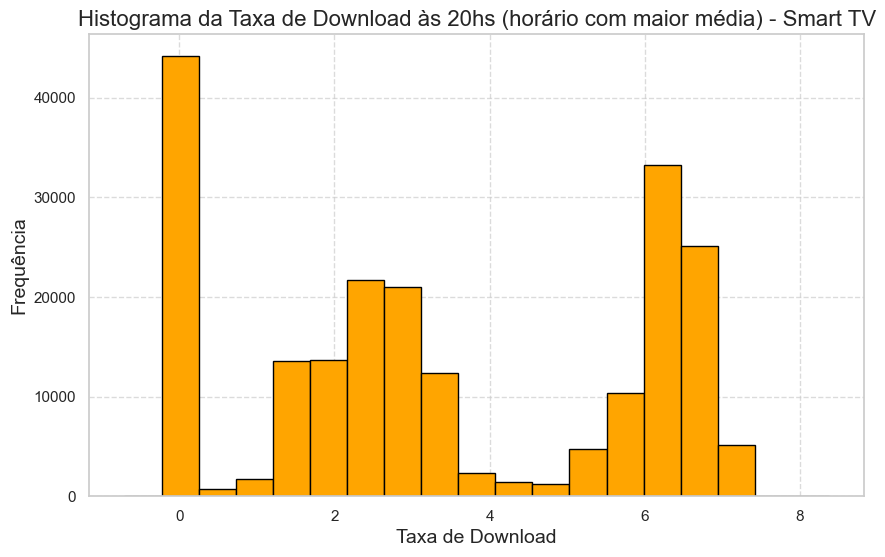

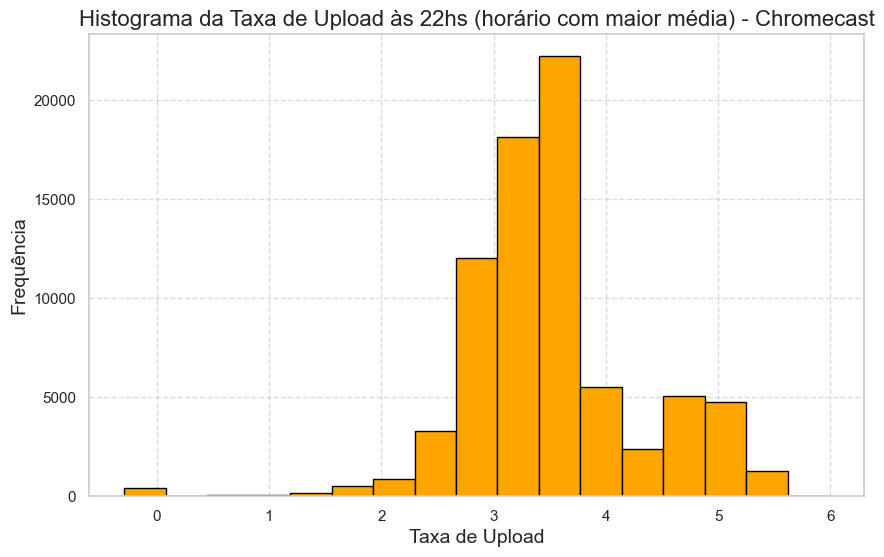

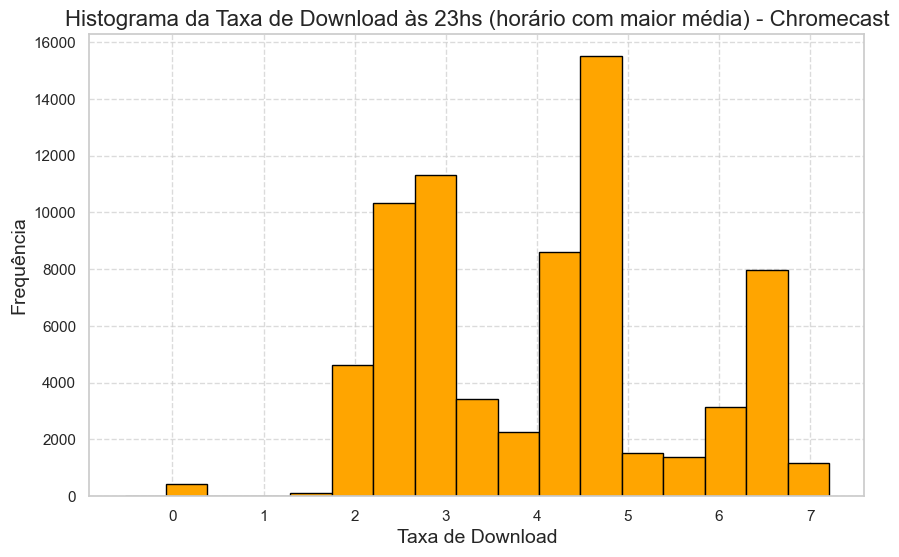

In [14]:
### Histogramas

# Função para criar histogramas
def plot_histogram(df, column, title, xlabel, ylabel):
    n = len(df[column])
    m = round(1 + 3.322 * math.log(n, 10))
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=m, edgecolor='black', color='orange')
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Criar histogramas para cada dataset
plot_histogram(dataset1, 'bytes_up', 'Histograma da Taxa de Upload às 20hs (horário com maior média) - Smart TV', 'Taxa de Upload', 'Frequência')
plot_histogram(dataset2, 'bytes_down', 'Histograma da Taxa de Download às 20hs (horário com maior média) - Smart TV', 'Taxa de Download', 'Frequência')
plot_histogram(dataset3, 'bytes_up', 'Histograma da Taxa de Upload às 22hs (horário com maior média) - Chromecast', 'Taxa de Upload', 'Frequência')
plot_histogram(dataset4, 'bytes_down', 'Histograma da Taxa de Download às 23hs (horário com maior média) - Chromecast', 'Taxa de Download', 'Frequência')

### Passo 3

Dois gráficos QQ Plot comparando os dados do dataset 1 com os do 3, e os dados do dataset 2 com os do 4.

<Figure size 1400x600 with 0 Axes>

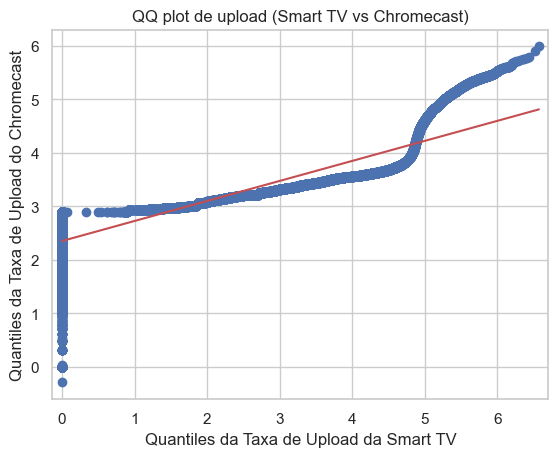

<Figure size 1400x600 with 0 Axes>

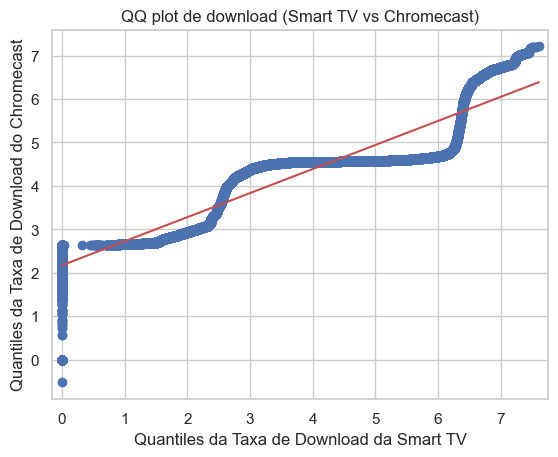

In [23]:
## QQ Plots

# Função para calcular quantis e interpolar dados
def interpolate_quantiles(smaller, larger):
    quantiles = np.linspace(0, 1, len(smaller))
    smaller_quantiles = np.quantile(smaller, quantiles)
    larger_quantiles = np.interp(quantiles, np.linspace(0, 1, len(larger)), np.sort(larger))
    return smaller_quantiles, larger_quantiles

# Ordenar os dados para interpolação
dataset1_sorted = dataset1["bytes_up"].sort_values().values
dataset3_sorted = dataset3["bytes_up"].sort_values().values
dataset2_sorted = dataset2["bytes_down"].sort_values().values
dataset4_sorted = dataset4["bytes_down"].sort_values().values

# Interpolar dados para upload (dataset1 e dataset3)
smaller_upload, larger_upload = (dataset1_sorted, dataset3_sorted) if len(dataset1_sorted) <= len(dataset3_sorted) else (dataset3_sorted, dataset1_sorted)
smaller_upload_quantiles, larger_smart_quantiles = interpolate_quantiles(smaller_upload, larger_upload)

# Interpolar dados para download (dataset2 e dataset4)
smaller_download, larger_download = (dataset2_sorted, dataset4_sorted) if len(dataset2_sorted) <= len(dataset4_sorted) else (dataset4_sorted, dataset2_sorted)
smaller_chromecast_quantiles, larger_download_quantiles = interpolate_quantiles(smaller_download, larger_download)

# Manter a ordem original dos dados
original_order_upload_smart = dataset1["bytes_up"].values
original_order_upload_chrome = dataset3["bytes_up"].values
original_order_download_smart = dataset2["bytes_down"].values
original_order_download_chrome = dataset4["bytes_down"].values

# Criar QQ plot para comparar upload (dataset1 e dataset3)
plt.figure(figsize=(14, 6))
sm.qqplot_2samples(original_order_upload_smart, original_order_upload_chrome, line='r')
plt.title('QQ plot de upload (Smart TV vs Chromecast)')
plt.xlabel('Quantiles da Taxa de Upload da Smart TV')
plt.ylabel('Quantiles da Taxa de Upload do Chromecast')
plt.show()

# Criar QQ plot para comparar download (dataset2 e dataset4)
plt.figure(figsize=(14, 6))
sm.qqplot_2samples(original_order_download_smart, original_order_download_chrome, line='r')
plt.title('QQ plot de download (Smart TV vs Chromecast)')
plt.xlabel('Quantiles da Taxa de Download da Smart TV')
plt.ylabel('Quantiles da Taxa de Download do Chromecast')
plt.show()

## Análise da correlação entre as taxas de upload e download para os horários com o maior valor de tráfego

Nessa seção é feita a análise se existe alguma correla ̧c ̃ao entre a taxa de upload e a taxa de download de um mesmo dispositivo. É calculado o coeficiente de correlação amostral e feito o gráfico scatter plot comparando as taxas dos seguintes datasets 1, 2, 3 e 4 definidos na seção anterior.

Coeficiente de correlação de Pearson entre upload e download da Smart TV:
0.915476744739879 



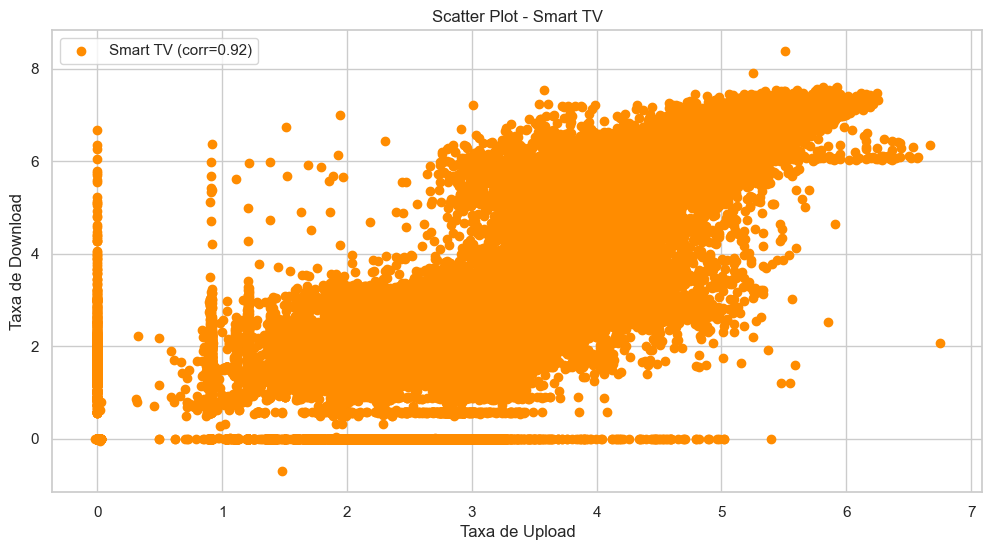

Coeficiente de correlação de Pearson entre upload e download do Chromecast:
0.2927880506464768


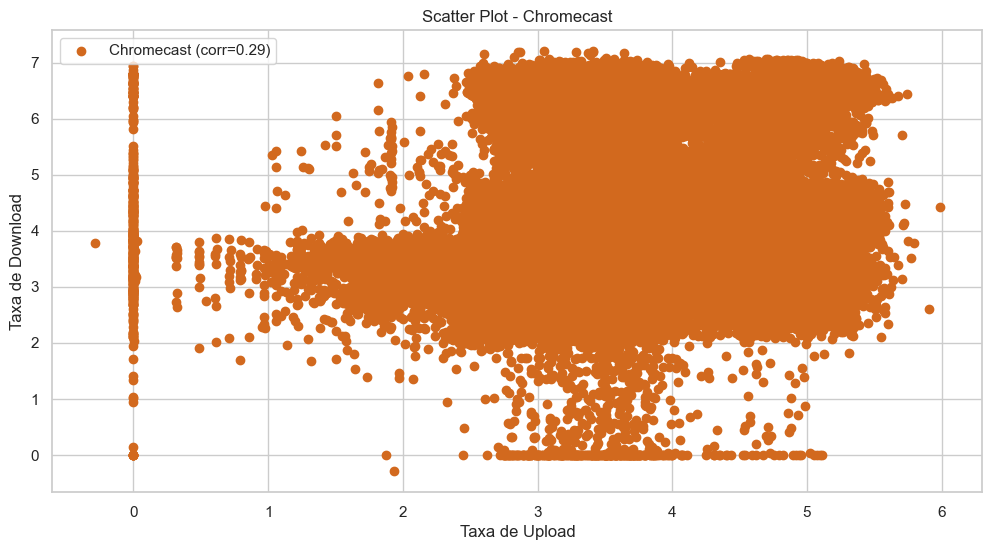

In [28]:
### Scatter Plots

# Função para interpolar dados
def interpolate_data(x, y, num_points):
    f = interp1d(x, y, kind='linear', fill_value="extrapolate")
    x_new = np.linspace(x.min(), x.max(), num_points)
    y_new = f(x_new)
    return x_new, y_new

# Interpolar dados para Smart TV
num_points = max(len(dataset1), len(dataset2))
x_smart_up, y_smart_up = interpolate_data(np.arange(len(dataset1)), dataset1["bytes_up"], num_points)
x_smart_down, y_smart_down = interpolate_data(np.arange(len(dataset2)), dataset2["bytes_down"], num_points)

# Interpolar dados para Chromecast
num_points = max(len(dataset3), len(dataset4))
x_chrome_up, y_chrome_up = interpolate_data(np.arange(len(dataset3)), dataset3["bytes_up"], num_points)
x_chrome_down, y_chrome_down = interpolate_data(np.arange(len(dataset4)), dataset4["bytes_down"], num_points)


# Calcular coeficiente de correlação de Pearson entre upload e download da Smart TV
print("Coeficiente de correlação de Pearson entre upload e download da Smart TV:")
corr_smart = np.corrcoef(y_smart_up, y_smart_down)[0, 1]
print(corr_smart, "\n")

# Criar scatter plot para os dados da Smart TV
plt.figure(figsize=(12, 6))
plt.scatter(y_smart_up, y_smart_down, color='#FF8C00', label=f'Smart TV (corr={corr_smart:.2f})')
plt.title('Scatter Plot - Smart TV')
plt.xlabel('Taxa de Upload')
plt.ylabel('Taxa de Download')
plt.legend()
plt.show()


# Calcular coeficiente de correlação de Pearson entre upload e download do Chromecast
print("Coeficiente de correlação de Pearson entre upload e download do Chromecast:")
corr_chrome = np.corrcoef(y_chrome_up, y_chrome_down)[0, 1]
print(corr_chrome)

# Criar scatter plot para os dados do Chromecast
plt.figure(figsize=(12, 6))
plt.scatter(y_chrome_up, y_chrome_down, color='#D2691E', label=f'Chromecast (corr={corr_chrome:.2f})')
plt.title('Scatter Plot - Chromecast')
plt.xlabel('Taxa de Upload')
plt.ylabel('Taxa de Download')
plt.legend()
plt.show()